## Real State - Price predictor


In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("Housing2.csv")

In [3]:
housing.head()
#shows top 5 rows

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2


In [4]:
housing.info()
#tells no:of entries and data columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   price      545 non-null    int64
 1   area       545 non-null    int64
 2   bedrooms   545 non-null    int64
 3   bathrooms  545 non-null    int64
 4   stories    545 non-null    int64
 5   parking    545 non-null    int64
dtypes: int64(6)
memory usage: 25.7 KB


In [5]:
housing['bedrooms'].value_counts()
#provide us the info about the count of value present in that perticular column 

3    300
2    136
4     95
5     10
6      2
1      2
Name: bedrooms, dtype: int64

In [6]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'area'}>],
       [<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'stories'}>,
        <AxesSubplot:title={'center':'parking'}>]], dtype=object)

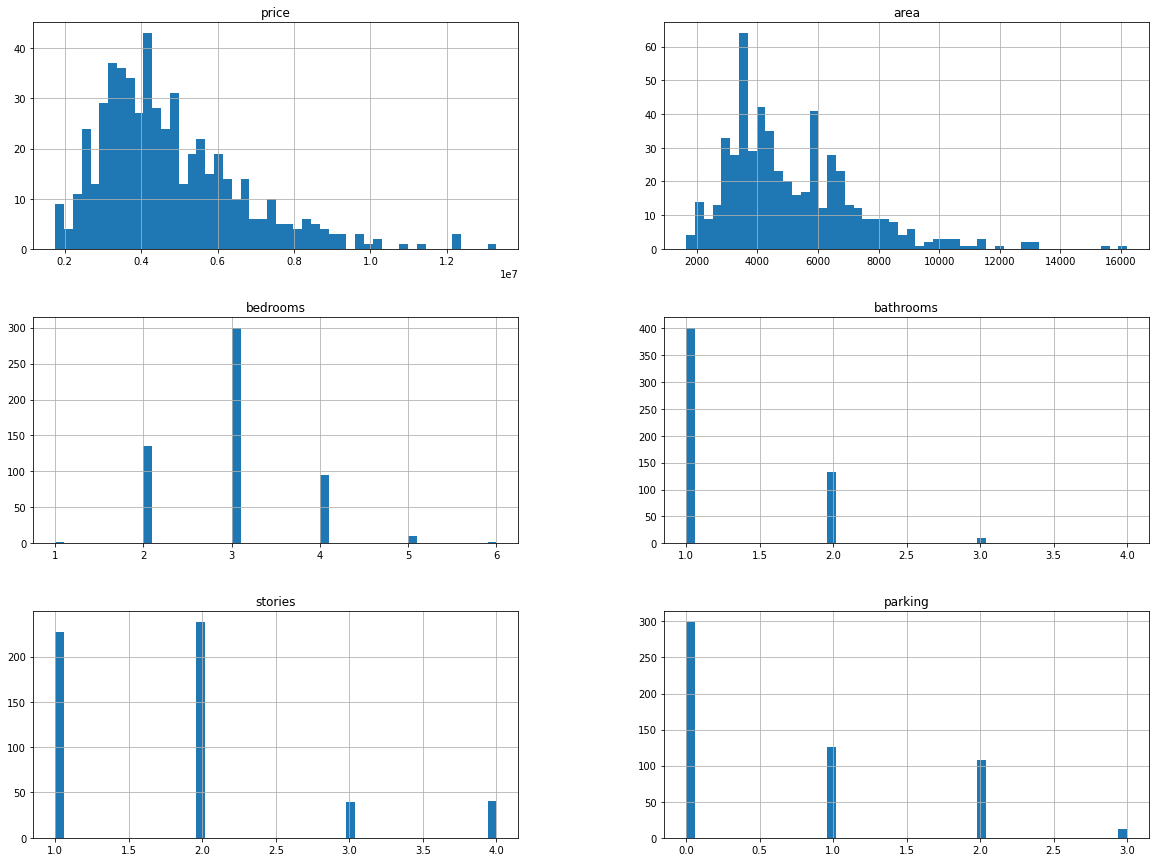

In [9]:
housing.hist(bins=50, figsize=(20,15))

## Train- Test Splitting

In [10]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")
      

Rows in train set: 436
Rows in test set: 109



In [11]:
 # now we will train the model soo that the taining test is proparly distributed

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1) 
for train_index, test_index in split.split(housing, housing['bedrooms']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [13]:
housing = strat_train_set.copy()

#  Checking out the correlations

In [14]:
corr_matrix = housing.corr()

In [15]:
corr_matrix['price'].sort_values(ascending=False)

price        1.000000
area         0.544580
bathrooms    0.535223
stories      0.411246
parking      0.381026
bedrooms     0.360907
Name: price, dtype: float64

In [16]:
# here 1 represents strong postive corelation
# if negative values are shown then the relation is inversaly propotional

In [17]:
corr_matrix['stories'].sort_values(ascending=False)

stories      1.000000
price        0.411246
bedrooms     0.409605
bathrooms    0.326489
area         0.077573
parking      0.031237
Name: stories, dtype: float64

In [18]:
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='bedrooms', ylabel='price'>,
        <AxesSubplot:xlabel='area', ylabel='price'>,
        <AxesSubplot:xlabel='parking', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='bedrooms'>,
        <AxesSubplot:xlabel='bedrooms', ylabel='bedrooms'>,
        <AxesSubplot:xlabel='area', ylabel='bedrooms'>,
        <AxesSubplot:xlabel='parking', ylabel='bedrooms'>],
       [<AxesSubplot:xlabel='price', ylabel='area'>,
        <AxesSubplot:xlabel='bedrooms', ylabel='area'>,
        <AxesSubplot:xlabel='area', ylabel='area'>,
        <AxesSubplot:xlabel='parking', ylabel='area'>],
       [<AxesSubplot:xlabel='price', ylabel='parking'>,
        <AxesSubplot:xlabel='bedrooms', ylabel='parking'>,
        <AxesSubplot:xlabel='area', ylabel='parking'>,
        <AxesSubplot:xlabel='parking', ylabel='parking'>]], dtype=object)

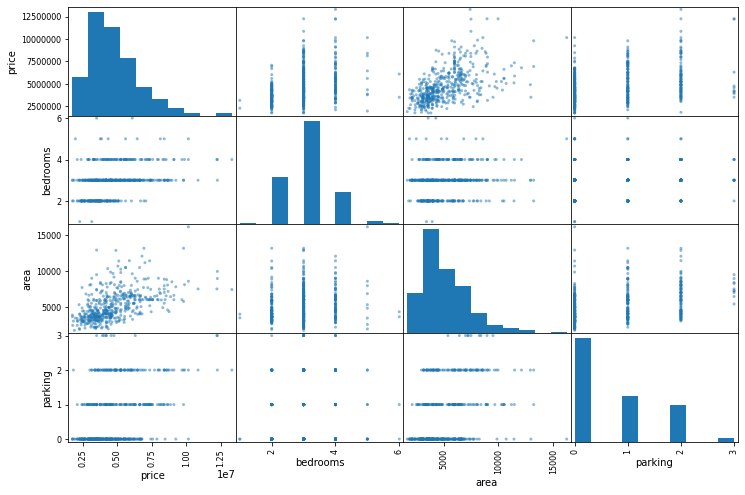

In [19]:
attributes = ["price","bedrooms","area","parking"]
scatter_matrix(housing[attributes], figsize = (12,8))

In [20]:
housing = strat_train_set.drop("bedrooms",axis=1)
housing_labels = strat_train_set["bedrooms"].copy()

#Missing Attributes


In [21]:
#As this data is collected from a good repository , so there are less chnces of missing data
#If data is missing we can do there 3 thigs:
# 1. get rid of the missing data points
# 2. get rid of the whole attribute
# 3. set the value to some value(0,mean,median)


In [22]:
#choosing 3rd option
#from sklearn.impute import SimpleImputer
#imputer = SimpleImputer(strategy = "mean")
#imputer.fit(housing)

# Scikit-learn Design

there are mainly 3 typer of objects:
1. Estimators - estimates some parameters based on datast . eg imputer
                it has fit method and transform method.
                Fit method - fit the dataset and calculates interbal parameters
                
2. Transformers - takes input and returns output based on learning from fit(). It has a convient function called fit_transform() which does things like fit and then transform .

3. Predictors - linear regression model is an example of predictor . Fit() and predict are two common functions.it also gives score() function which will wvaluate the predictions
    

# Feature Scalling guide

Basically we have two methods for this:
  1. Min-Max scalling(Normilization)
          (value - min)/(max - min )
        sklearn provides class called MinMaxScaler for this
  2. Standerdization 
          (value - mean)/std
        sklearn provides class called Standard Scaller for this  
        

# Creating Pipeline

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

In [24]:
housing_tr = my_pipeline.fit_transform(housing)

In [25]:
housing_tr

array([[-0.52639743, -0.73071545, -0.56488665, -0.92282654, -0.81003765],
       [ 1.02559247,  0.61861206,  1.42644039,  1.40802399, -0.81003765],
       [-0.11379524, -0.49807277,  1.42644039, -0.92282654, -0.81003765],
       ...,
       [ 0.1928174 ,  2.90316312, -0.56488665,  0.24259873, -0.81003765],
       [ 1.17700612,  3.73602389, -0.56488665, -0.92282654,  0.3677619 ],
       [ 1.01423645,  0.38596939, -0.56488665,  0.24259873,  0.3677619 ]])

In [26]:
housing_tr.shape

(490, 5)

# Selecting a desired model


In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(housing_tr, housing_labels)

RandomForestRegressor()

In [63]:
some_data = housing.iloc[:5]

In [64]:
some_labels = housing_labels.iloc[:5]


In [65]:
prepared_data = my_pipeline.transform(some_data)

In [66]:
model.predict(prepared_data)

array([2.05, 3.04, 2.45, 2.65, 3.68])

In [67]:
list(some_labels)

[2, 3, 2, 2, 4]

# E valuating the error


In [68]:
from sklearn.metrics import mean_squared_error
import numpy as np
housing_predictions = model.predict(housing_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [69]:
mse

0.06202551020408164

# Cross validation

In [70]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_tr,housing_labels, scoring= "neg_mean_squared_error", cv= 10)
rsme_scores = np.sqrt(-scores)

In [71]:
rsme_scores

array([0.60827961, 0.67722573, 0.74403615, 0.61815558, 0.59599685,
       0.6649321 , 0.54640196, 0.64961056, 0.73833652, 0.66743799])

In [72]:
def print_scores(scores):
    print("scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())
    

In [73]:
print_scores(rsme_scores)

scores:  [0.60827961 0.67722573 0.74403615 0.61815558 0.59599685 0.6649321
 0.54640196 0.64961056 0.73833652 0.66743799]
Mean:  0.6510413052438753
Standard deviation:  0.05857242585408887


In [74]:
from joblib import dump, load
dump(model, 'Yashi.joblib')

['Yashi.joblib']